<a href="https://colab.research.google.com/github/madonnaojorin/Intro_to_MathBio/blob/main/Exponential_Logistic_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

In theory, any kind of organism could take over the Earth just by reproducing. For instance, the basic problem of mitosis, to make two cells from one. When a cell divides, again and again, what does that imply about the resulting collection of cells?

If we think of one *E. coli* bacterium on a plate, how many bacteria do we have after a day?

##Modeling population growth rates

To capture the idea of a growing population, let's think of a single celled organism, such as a bacterium or a cilliate. Assume the individuals divide once per day, in this population. So, starting with a single individual at day 0, we expect, in successive days, 2, 4, 8, 16, 32, and 64 individuals in the population.

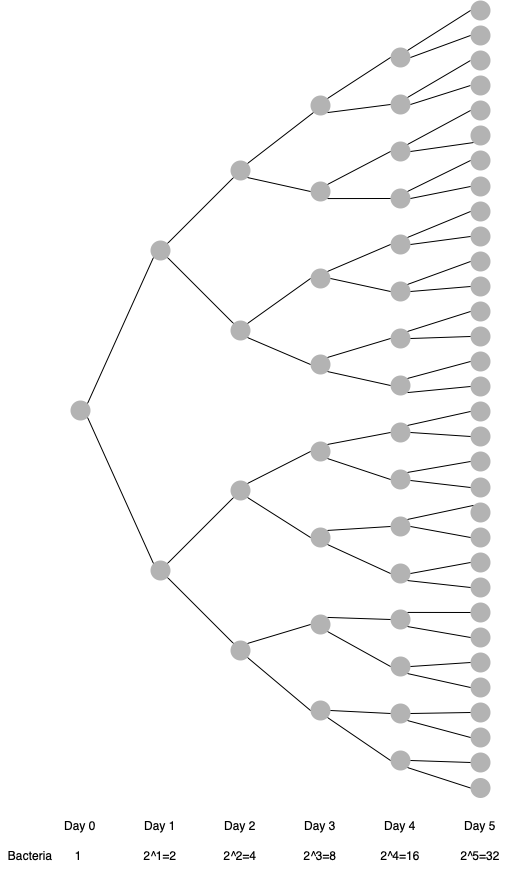

We can see that, on any particular day, the number of individuals in the population is simply twice what the number was the day before, so the number today, call it $N(\text{today})$, is equal to twice the number yesterday, call it $N(\text{yesterday})$, which we can write more compactly as $$N(\text{today}) = 2N(\text{yesterday}).$$

In general, 
$$N(t)=N(0)2^t$$
where $t$ is time and $t=0$ indicates Day 0.


We assumed that one cell becomes 2 cells each day; however, the division rate could be any number and the general equation becomes,
$$N(t)=N(0)R^t$$

where $R$ is usually called the finite rate of population increase. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.optimize import curve_fit

In [31]:
# Define parameters for the growth
N_0 = 1    # Initial number of bacteria 
R = 2      # Growth rate of cells in generations per minute
Days = 10 

time_range = np.arange(0, Days, 0.1)

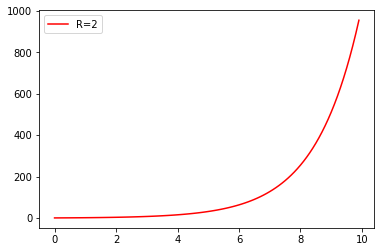

In [32]:
 # Compute the solution.
N_t = N_0 * R**time_range

# Plot the analytical solution as a red line. 
plt.plot(time_range, N_t, 'r-', label='R=2')
plt.legend()

Let's plot the curve for different values of $R$.

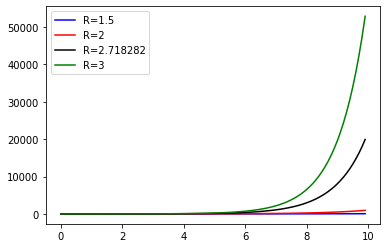

In [33]:
plt.plot(time_range, N_0 * 1.5**time_range, 'b-', label='R=1.5')
plt.plot(time_range, N_0 * 2**time_range, 'r-', label='R=2')
plt.plot(time_range, N_0 * 2.718282**time_range, 'k-', label='R=2.718282')
plt.plot(time_range, N_0 * 3**time_range, 'g-', label='R=3')

plt.legend()

$R = 2.718282$ is Euler’s constant. Expressing whatever value of $R$ as Euler’s constant raised to some power is actually extremely useful. That is, we can rewrite the previous equation as:

$$N(t)=N(0)e^{rt}$$

where the constant $r$ is referred to as the **intrinsic growth rate** of natural increase.
Taking the natural log of both sides we get

\begin{align}\ln(N(t))=rt\end{align}



Another way of looking at this figure is asking *what is the rate at which the population is growing at time $t$*. The rate is symbolized as $\frac{dN}{dt}$ which simply means “change in population ($N$) relative to change in time ($t$),”.
Differentiating both sides we get

$$\frac{d\ln N(t)}{dt}=r$$

Recall that the rate of change of the log of a number is the same as the “per capita” change in that number, so we have

$$\frac{d\ln N(t)}{dt}=\frac{dN(t)}{N(t)dt}=r$$

thus,

$$\frac{dN(t)}{dt}=rN(t)$$



The key concept of exponential growth is that the population growth rate —the number of organisms added in each generation—increases as the population gets larger. And the results can be dramatic.

f we assume no movement of individuals into or out of the population, 
$r$ is just a function of birth and death rates. That is,

$$r = Birth - Death$$

if $Birth\:\: rate > Death\:\: rate$, then the population increases without any threshold.

###But... is that realistic???

##Logistic growth

Exponential growth is not a very sustainable state of affairs, since it depends on infinite amounts of resources (which tend not to exist in the real world).
Exponential growth may happen for a while, if there are few individuals and many resources. But when the number of individuals gets large enough, resources start to get used up, slowing the growth rate. Eventually, the growth rate will plateau, or level off, making an S-shaped curve. The population size at which it levels off, which represents the maximum population size a particular environment can support, is called the **carrying capacity**, or $K$.

We can mathematically model logistic growth by modifying our equation for exponential growth, using an $r$ (per capita growth rate) that depends on population size (N) and how close it is to carrying capacity ($K$). Assuming that the population has a base growth rate of $r_{max}$ when it is very small, we can write the following equation:
$$\frac{dN}{dT}=r_{max}\left(1-\frac{N(t)}{K}\right)N(t)$$

Let's think about what $\left(1-\frac{N(t)}{K}\right)$ mean.

At any given point in time during a population's growth, the expression $\frac{N(t)}{K}$ tells us how much of population is occupied. When total population is at the carrying capacity ($N(t)=K$), $1-\frac{N(t)}{K}=0$, that means the population does not grow anymore. If, the population $N(t)$ is very small, hoewever, $1-\frac{N(t)}{K}$ is close to 1, and that is the exponential growth. 

The more carrying capacity that has been used up, the more the 
$1-\frac{N(t)}{K}$ term will reduce the growth rate.

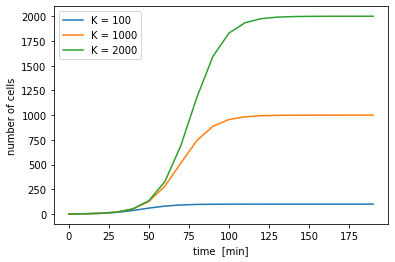

In [41]:
# Set the carrying capacity:
K = [100, 1000, 2000]

# Define parameters 
N_0 = 1  
r = 0.1
total_time = 200

# Extend the total time of the integration
delta_t = 0.1
time_range = np.arange(0, total_time, delta_t)
n_time_steps = int(total_time / delta_t)
# Set the storage vector so we don't rewrite our correct approach
N_t = np.zeros((len(K), n_time_steps))
N_t[:, 0] = N_0

# Loop through each carrying capacity
for k in range(len(K)): 
    
    # Loop through each time step.
    for t in range(1, n_time_steps): 
    
        # Calculate the change in the number of cells. 
        dN = N_t[k, t - 1] * r * delta_t * (1 - N_t[k, t - 1] / K[k])
    
        # Update the number of cells at the current time point
        N_t[k, t] = N_t[k, t - 1] + dN
         
# Loop through the carrying capacities and plot every 100th point.
for i in range(len(K)):
    plt.plot(time_range[::100], N_t[i, ::100], '-', label='K = ' + str(K[i]))
    
# Add appropriate labels and legends. 
plt.xlabel('time  [min]')
plt.ylabel('number of cells')
plt.legend() 

##Analytical Solution for Logistic Growth
Though still manageable, the analytical solution for logistic growth is not nearly as trivial as finding the analytical solution for unrestricted exponential growth. Here is the expression:

$$N(t)=\frac{N_0K}{e^{-rt}(K-N_0)+N_0}$$


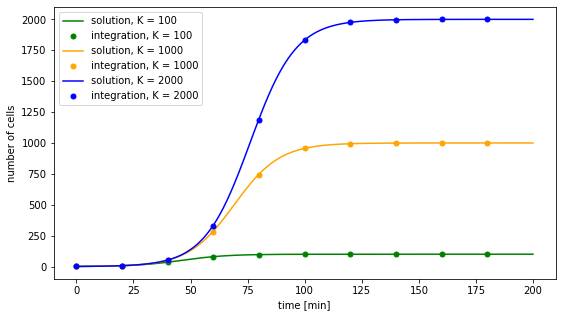

In [42]:
# Solve the analytical solution for our three carrying capacities.  
solution = np.zeros((len(K), n_time_steps))
for i in range(len(K)):
    solution[i, :] = N_0 * K[i] / (np.exp(-r * time_range) * (K[i] - N_0) + N_0)
    
# Define the colors so they match up. 
colors = ['green', 'orange', 'blue']

# Set up a figure that's a bit bigger
fig = plt.figure(figsize=(9, 5))

# Plot the analytical solutions and numerical integrations 
for i in range(len(K)):
    # Analytical solution
    plt.plot(time_range, solution[i,:], color=colors[i], 
             label='solution, K = ' + str(K[i]))
    
    # Numerical integration
    plt.plot(time_range[::200], N_t[i, ::200], '.', markersize=10, color=colors[i],
            label='integration, K = ' + str(K[i]))
   
# Add axis labels and a legend.
plt.xlabel('time [min]')
plt.ylabel('number of cells')
plt.legend()

[References]

* https://www.khanacademy.org/science/ap-biology/ecology-ap/population-ecology-ap/a/exponential-logistic-growth
* https://www.nature.com/scitable/knowledge/library/how-populations-grow-the-exponential-and-logistic-13240157/
* http://www.rpgroup.caltech.edu/ncbs_pboc/code/t1a_numerical_integration.html